In [1]:
import re
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Uncomment below cell to download these packages
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/maishaanika/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maishaanika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maishaanika/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maishaanika/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv("tweet_data- Maisha.csv")
df.head()

,sentiment,tweet_id,tweet
0,neg,1,@bullyosullivan oh no! so sorry about your pet...
1,neg,2,@anneaam you should! i love prison break.i onl...
2,neg,3,i saw some really nice pair of shoess.. couldn...
3,neg,4,hihihi i had fun but my foot is still hurting!...
4,neg,5,sourish limbs is preventing me from gg out on ...


In [3]:
X = df['tweet'].values
y = df['sentiment'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print(X_train[:10])
print(y_train[:10])

[' @rossfootball: #purge anyone who congratulates another party for defeating labour. '
 'crickey!!! time for bed. tomorrow should be interesting. may miss....again.  must....go....to sleep!!!'
 "@alistardean celebrating - thx, twittering and baking a cake at the same time doesn't; mix "
 'hello world. how are you this evening? how is everyone '
 '@emfk for me tweetdeck skips almost 60% of tweets in my groups, i just see random ones '
 '1860-1876 16vol transactions of national association promotion social science  '
 "#games #graphics new espn here's the kicker: vikings replace blair walsh  "
 'ran up &amp; down 3 miles of muddy hills safely yesterday morning, but stopped a soccer ball with my ankle last night &amp; it still hurts '
 '@makingthemoment ok ok it was mike, happy? '
 'if only they had a &quot;its raining too hard, work is cancled&quot; day ']
['neu' 'neg' 'pos' 'pos' 'pos' 'neu' 'neu' 'neg' 'pos' 'neg']


In [6]:
def clean_text(text):
    totalStopwords = set([word.replace("'",'') for word in stopwords.words('english')])
    text = text.lower()
    text = text.replace("'",'')
    text = re.sub('[^a-zA-Z]',' ',text)
    words = text.split()
    words = [lemma.lemmatize(word) for word in words if (word not in totalStopwords) and (len(word)>1)] # Remove stop words
    text = " ".join(words)
    return text

In [7]:
X_train = map(clean_text, X_train)
X_test  = map(clean_text, X_test)

In [8]:
X_train = list(X_train)
X_test  = list(X_test)

In [9]:
X_train[:10]

['rossfootball purge anyone congratulates another party defeating labour',
 'crickey time bed tomorrow interesting may miss must go sleep',
 'alistardean celebrating thx twittering baking cake time mix',
 'hello world evening everyone',
 'emfk tweetdeck skip almost tweet group see random one',
 'vol transaction national association promotion social science',
 'game graphic new espn here kicker viking replace blair walsh',
 'ran amp mile muddy hill safely yesterday morning stopped soccer ball ankle last night amp still hurt',
 'makingthemoment ok ok mike happy',
 'quot raining hard work cancled quot day']

In [10]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.6334

Classification report : 
               precision    recall  f1-score   support

         neg       0.61      0.65      0.63     21424
         neu       0.77      0.67      0.72     10611
         pos       0.60      0.60      0.60     20519

    accuracy                           0.63     52554
   macro avg       0.66      0.64      0.65     52554
weighted avg       0.64      0.63      0.63     52554


Confusion Matrix : 
 [[13881   928  6615]
 [ 1791  7082  1738]
 [ 7038  1156 12325]]


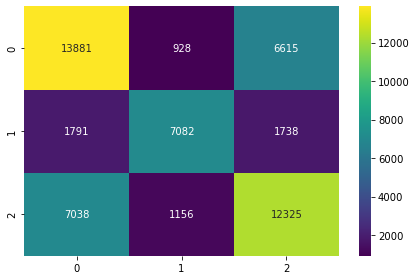

In [12]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

========== Random Forest ==========

Accuracy on validation set: 0.7189

Classification report : 
               precision    recall  f1-score   support

         neg       0.69      0.74      0.71     21424
         neu       0.85      0.78      0.81     10611
         pos       0.69      0.67      0.68     20519

    accuracy                           0.72     52554
   macro avg       0.74      0.73      0.73     52554
weighted avg       0.72      0.72      0.72     52554


Confusion Matrix : 
 [[15853   602  4969]
 [ 1255  8226  1130]
 [ 5959   860 13700]]


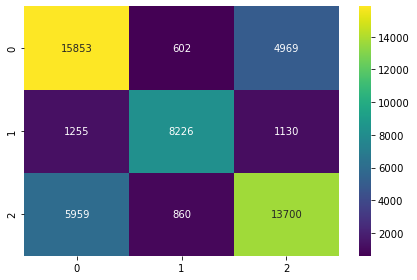

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

========== Naive Bayes ==========

Accuracy on validation set: 0.7154

Classification report : 
               precision    recall  f1-score   support

         neg       0.67      0.81      0.73     21424
         neu       0.96      0.65      0.78     10611
         pos       0.69      0.65      0.67     20519

    accuracy                           0.72     52554
   macro avg       0.77      0.70      0.73     52554
weighted avg       0.74      0.72      0.72     52554


Confusion Matrix : 
 [[17271    97  4056]
 [ 1663  6900  2048]
 [ 6922   169 13428]]


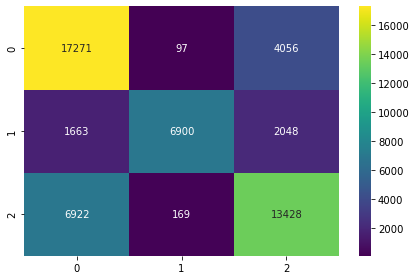

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
pred_nb = nb_model.predict(X_test)
results_nb = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

/Users/maishaanika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== Logistic Regression ==========

Accuracy on validation set: 0.7570

Classification report : 
               precision    recall  f1-score   support

         neg       0.75      0.74      0.74     21424
         neu       0.85      0.86      0.86     10611
         pos       0.72      0.72      0.72     20519

    accuracy                           0.76     52554
   macro avg       0.77      0.77      0.77     52554
weighted avg       0.76      0.76      0.76     52554


Confusion Matrix : 
 [[15802   668  4954]
 [  548  9174   889]
 [ 4726   984 14809]]


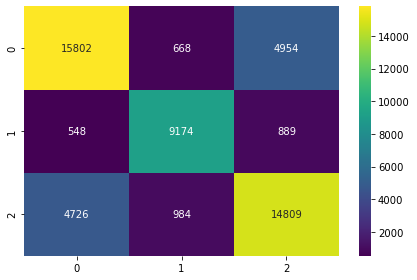

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

In [20]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Logistics Regression' : results_lr,
    'Naive Bayes' : results_nb,
    'Random Forest' : result_rf,
    'Decision tree' : result_dt
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+------------------------+---------------+-----------------+-----------------+
| Metrics   |   Logistics Regression |   Naive Bayes |   Random Forest |   Decision tree |
|-----------+------------------------+---------------+-----------------+-----------------|
| accuracy  |               0.757031 |      0.715436 |        0.718861 |        0.633406 |
| precision |               0.771414 |      0.772779 |        0.742768 |        0.65997  |
| recall    |               0.774627 |      0.703613 |        0.727624 |        0.638667 |
| f1-score  |               0.772972 |      0.725804 |        0.73424  |        0.647856 |
+-----------+------------------------+---------------+-----------------+-----------------+


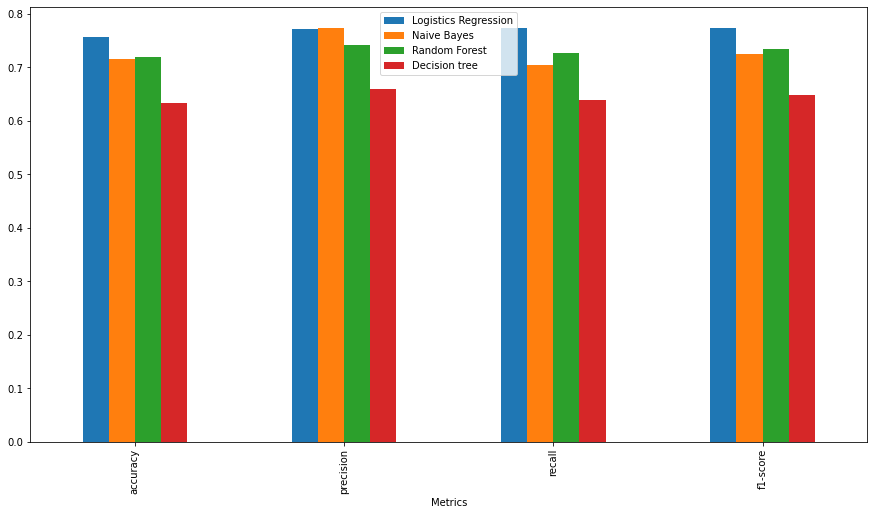

In [21]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

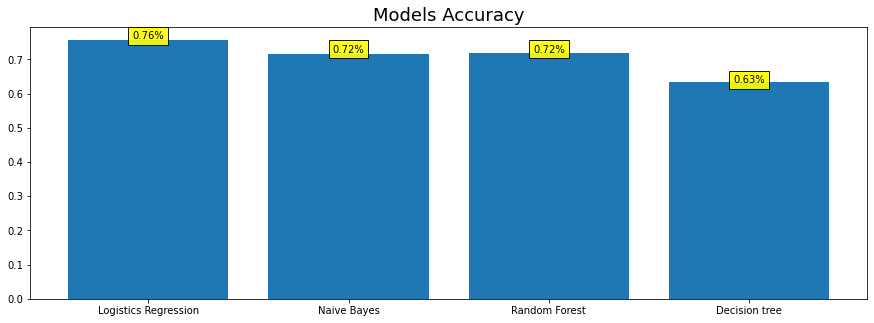

In [22]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()